## 特征选择

### 过滤法

全部特征-->最佳特征子集-->算法-->模型评估

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv("./data/digit recognizor.csv")

In [11]:
data.shape

(42000, 785)

In [12]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [14]:
# 读取数据
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

#### 方差过滤  
方差过小表示数据本身的差异性很小，可能每一个样本在当前特征下的取值都相同，所以这个特征几乎是没有用的

In [15]:
from sklearn.feature_selection import VarianceThreshold

In [16]:
selector = VarianceThreshold()
x_var = selector.fit_transform(x)

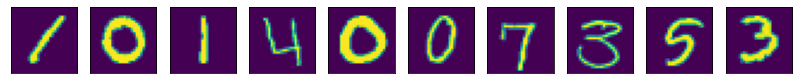

In [56]:
fig, axes = plt.subplots(1, 10, figsize=(14, 7))
for i in range(10):
    a = x.iloc[i, :].values
    a = a.reshape(28, 28)
    axes[i].imshow(a)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

In [58]:
pd.DataFrame(x_var).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
## 留下一半的特征
var_x = VarianceThreshold( np.median(x.var().values))
pd.DataFrame(var_x.fit_transform(x))

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,18,30,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,25,130,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,128,255,255,255,128,0,0,0
41998,0,0,0,146,237,252,189,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# 二项分布，方差为p*(1-p)
x_bvar = VarianceThreshold(0.8 * (1-.8))
x_bvar.fit_transform(x).shape

(42000, 685)

#### 方差过滤的效果

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [62]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [64]:
## KNN
knn = KNeighborsClassifier()
cross_val_score(knn, X, Y, cv=5).mean()

In [65]:
rfc =  RandomForestClassifier(n_estimators=10, random_state=10)
cross_val_score(rfc, X, Y, cv=10).mean()

0.9397380952380953

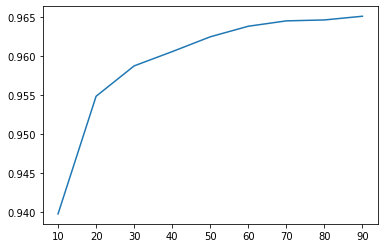

In [66]:
#　学习曲线的绘制
score = []
for i in range(10, 100, 10):
    rfc =  RandomForestClassifier(n_estimators=i, random_state=10)
    score.append(cross_val_score(rfc, X, Y, cv=10).mean())

plt.plot(range(10, 100, 10), score)
plt.show()

In [67]:
#　使用方差过滤
Var_X = VarianceThreshold(threshold=np.median(X.var().values))
Var_X = Var_X.fit_transform(X)

In [68]:
Var_X.shape

(42000, 392)

In [ ]:
# 随机森林 方差未过滤
%%time
rfc = RandomForestClassifier(random_state=10, n_estimators=100)
cross_val_score(rfc, X, y, cv=10).mean()

In [ ]:
%%time 
# 随机森林 方差
rfc = RandomForestClassifier(random_state=10, n_estimators=100)
print(cross_val_score(rfc, Var_X, y, cv=10).mean())

In [ ]:
# 单棵决策树的效果
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
cross_val_score(dtc, Var_X, y, cv=5).mean()

### 卡方检验　
卡方过滤是专门针对**离散型标签（即分类问题）**的相关性过滤。卡方检验类feature_selection.chi2计算每个非负
特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。再结合feature_selection.SelectKBest
这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目
的无关的特征

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
# 方差过滤
%time
X_chi2 = SelectKBest(chi2, k=300)
X_chi2 = X_chi2.fit_transform(Var_X, y)
print(X_chi2.shape)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs
(42000, 300)


In [101]:
# 验证模型
cross_val_score(RandomForestClassifier(random_state=10
                                       , n_estimators=10)
                , X_chi2
                , y
                , cv=10).mean()

0.9369050160902587

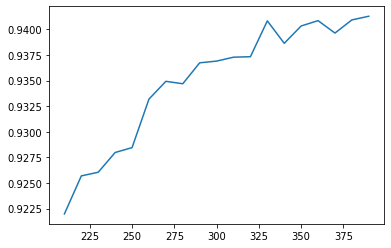

In [103]:
# 使用学习曲线进行验证数据
score = []
for i in range(390, 200, -10):
    X_chi = SelectKBest(chi2, k = i)
    X_chi = X_chi.fit_transform(Var_X, y)
    score.append(cross_val_score(RandomForestClassifier(n_estimators=10
                                                        , random_state=10)
                                 , X_chi
                                 , y
                                 ,cv=10
                                ).mean())
plt.plot(range(390, 200, -10), score)
plt.show()

In [27]:
# 卡方的P值检验
chivalue, pvalue_chi = chi2(Var_X, y)
chivalue.shape

(392,)

In [28]:
pvalue_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
k = chivalue.shape[0] - (pvalue_chi>0.5).sum()

In [30]:
k

392

### F检验  
F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也
可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回
归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据

In [31]:
from sklearn.feature_selection import f_classif

In [32]:
F, pvalue = f_classif(Var_X, y)

In [33]:
F.shape, pvalue.shape

((392,), (392,))

In [36]:
# 删除指定数值的特征
k = F.shape[0] - (pvalue > 0.05).sum()
k

392

### 嵌入法

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=10, random_state=10)
X_embeded = SelectFromModel(rfc, threshold=0.005).fit_transform(X, y)

In [47]:
X_embeded.shape

(42000, 47)

In [51]:
# 绘制学习曲线
rfc = rfc.fit(X, y)
rfc.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.23090046e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.64222426e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

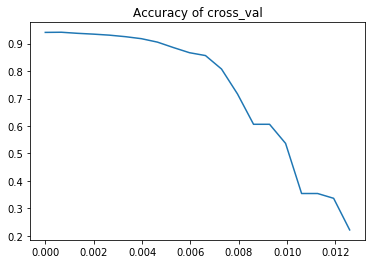

In [52]:
# 权值系数是一个非常重要的值，通过画学习曲线可以直观的观察超参数的取值对模型的变化
score = []

for i in np.linspace(0, rfc.feature_importances_.max(), 20):
    x_embeded = SelectFromModel(rfc, threshold=i).fit_transform(X, y)
    grade = cross_val_score(rfc, x_embeded, y, cv=10).mean()
    score.append(grade)
plt.plot(np.linspace(0, rfc.feature_importances_.max(), 20), score)
plt.title("Accuracy of cross_val")
plt.show()

In [60]:
X_embeded = SelectFromModel(rfc)
X_embeded = X_embeded.fit_transform(X, y)
rfc.n_estimators = 100

In [61]:
cross_val_score(rfc, X_embeded, y, cv=5).mean()

0.9613338171834913

### Wrpper 包装法

In [62]:
from sklearn.feature_selection import RFE

In [64]:
selector = RFE(rfc, n_features_to_select=340, step=50).fit(X, y)

In [67]:
selector.get_params

<bound method BaseEstimator.get_params of RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=10,
                                     verbose=0, warm_start=False),
    n_features_to_select=340, step=50, verbose=0)>

In [69]:
selector.support_.sum()

340

In [70]:
selector.ranking_

array([10,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        7,  7,  7,  7,  7,  8,  7,  6,  7,  6,  7,  7,  7,  7,  7,  8,  8,
        7,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  7,  7,  6,  5,  4,  4,
        3,  3,  4,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  9,  9,  9, 10,
       10, 10,  9,  8,  6,  6,  5,  4,  4,  2,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  3,  3,  4,  6,  5,  7, 10, 10, 10, 10, 10,  7,  7,  5,  5,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  4,  4,
        5,  6,  7, 10, 10, 10,  9,  7,  5,  5,  4,  3,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  6,  7, 10, 10, 10,
       10,  7,  5,  4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  5,  6, 10, 10, 10,  7,  5,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  6,  7,  8,  9

In [71]:
warpper = selector.transform(X)

In [72]:
cross_val_score(rfc, warpper, y, cv=5).mean()

0.9632383639568669